In [1]:
# 해시태그 데이터 불러오기

import pandas as pd

raw_total = pd.read_excel('../2022 하계 모각코 자료/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#넉둥베기', '#접짝뼈국고기로', '#산적', '#먹선생제주도존', '#먹선생...
1    ['#말고기연구소▫️제주', '#푸돌핀_제주', '#제주도여행', '#제주도맛집',...
2    ['#제주세원이네', '#세원이네✔️갈치조림정식(갈치구이+갈치조림+8첩반상+보말국)...
Name: tags, dtype: object

In [2]:
tags_total = [ ]

for tags in raw_total['tags']:
    # 슬라이싱을 통해 시작과 끝 부분의 [] 기호를 없앤 뒤, 콤마를 기준으로 해시태그를 나눔
    tags_list = tags[2 : -2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [3]:
# 해시태그 출현 빈도 집계

from collections import Counter
# Counter() 함수를 사용하면 그룹 내 원소의 종류별로 빈도수를 집계함
tags_count = Counter(tags_total)

In [4]:
# 빈도 순으로 확인
tags_count.most_common(50)

[('#제주맛집', 485),
 ('#제주여행', 448),
 ('#제주도맛집', 355),
 ('', 277),
 ('#제주도', 172),
 ('#제주도여행', 162),
 ('#애월맛집', 148),
 ('#제주', 144),
 ('#제주공항근처맛집', 123),
 ('#서귀포맛집', 110),
 ('#제주핫플', 109),
 ('#제주시맛집', 98),
 ('#제주가볼만한곳', 95),
 ('#제주관광', 95),
 ('#jeju', 80),
 ('#제주공항맛집', 73),
 ('#제주카페', 72),
 ('#제주도민맛집', 61),
 ('#중문맛집', 60),
 ('#제주살이', 58),
 ('#제주맛집추천', 55),
 ('#한림맛집', 53),
 ('#협재맛집', 51),
 ('#여행', 48),
 ('#먹스타그램', 48),
 ('#제주애월맛집', 48),
 ('#일상', 47),
 ('#제주도가볼만한곳', 47),
 ('#제주도카페', 41),
 ('#좋아요', 38),
 ('#애월가볼만한곳', 38),
 ('#맞팔', 37),
 ('#제주핫플레이스', 36),
 ('#가족여행', 36),
 ('#제주여행코스', 35),
 ('#제주도민', 33),
 ('#제주도맛집추천', 32),
 ('#성산맛집', 32),
 ('#여행스타그램', 32),
 ('#제주스냅', 30),
 ('#애월해안도로맛집', 30),
 ('#서귀포', 29),
 ('#애월카페', 29),
 ('#월정리맛집', 28),
 ('#제주중문맛집', 28),
 ('#데일리', 27),
 ('#애월횟집', 27),
 ('#좋반', 26),
 ('#성산일출봉맛집', 26),
 ('#제주선물', 26)]

In [20]:
STOPWORDS = [
    '', '#일상', '#좋아요', '#맞팔', '#가족여행', '#제주스냅', '#데일리', '#좋반', '#좋아요반사', '#소통' 
]

tags_total_selected = [ ]

for tag in tags_total:
    if tag not in STOPWORDS:
        tags_total_selected.append(tag)

tags_counts_selected = Counter(tags_total_selected)
tags_counts_selected.most_common(50)

[('#제주맛집', 485),
 ('#제주여행', 448),
 ('#제주도맛집', 355),
 ('#제주도', 172),
 ('#제주도여행', 162),
 ('#애월맛집', 148),
 ('#제주', 144),
 ('#제주공항근처맛집', 123),
 ('#서귀포맛집', 110),
 ('#제주핫플', 109),
 ('#제주시맛집', 98),
 ('#제주가볼만한곳', 95),
 ('#제주관광', 95),
 ('#jeju', 80),
 ('#제주공항맛집', 73),
 ('#제주카페', 72),
 ('#제주도민맛집', 61),
 ('#중문맛집', 60),
 ('#제주살이', 58),
 ('#제주맛집추천', 55),
 ('#한림맛집', 53),
 ('#협재맛집', 51),
 ('#여행', 48),
 ('#먹스타그램', 48),
 ('#제주애월맛집', 48),
 ('#제주도가볼만한곳', 47),
 ('#제주도카페', 41),
 ('#애월가볼만한곳', 38),
 ('#제주핫플레이스', 36),
 ('#제주여행코스', 35),
 ('#제주도민', 33),
 ('#제주도맛집추천', 32),
 ('#성산맛집', 32),
 ('#여행스타그램', 32),
 ('#애월해안도로맛집', 30),
 ('#서귀포', 29),
 ('#애월카페', 29),
 ('#월정리맛집', 28),
 ('#제주중문맛집', 28),
 ('#애월횟집', 27),
 ('#성산일출봉맛집', 26),
 ('#제주선물', 26),
 ('#jejuisland', 26),
 ('#애월', 25),
 ('#제주도핫플', 25),
 ('#애월맛집추천', 25),
 ('#제주일상', 25),
 ('#제주횟집', 24),
 ('#맛집', 24),
 ('#신제주맛집', 23)]

In [21]:
# 막대 차트로 해시태그 살펴보기

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font', family = font_name)

In [22]:
tag_counts_df = pd.DataFrame(tags_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

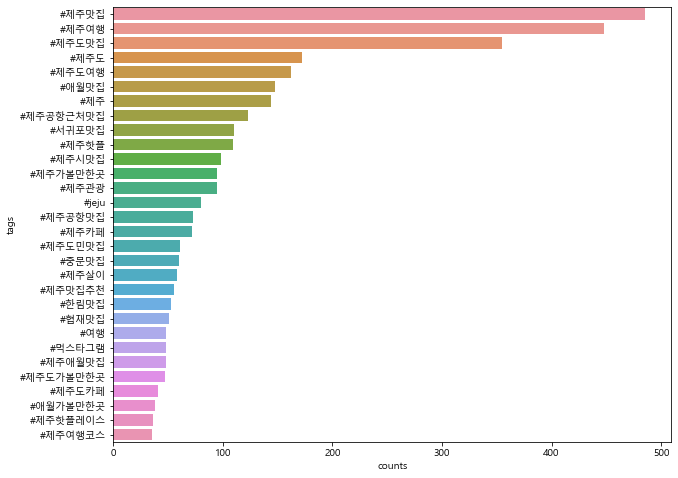

In [23]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [24]:
!pip install wordcloud

In [28]:
# 워드 클라우드 그리기
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

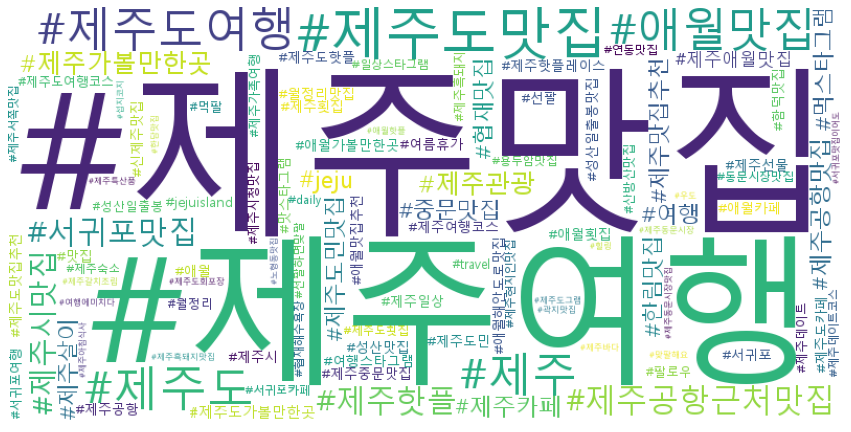

In [30]:
wordcloud = WordCloud(font_path = font_path,
                background_color = "white",
                max_words = 100,
                relative_scaling = 0.3,
                width = 800,
                height = 400
                ).generate_from_frequencies(tags_counts_selected)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('../2022 하계 모각코 자료/5_Jeju_Hotplace/files/2_tag_wordcloud.png')